In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from detect_outlier import *
from support_function.reporting import reporting
from GA import Genetic_Alogorithm
from support_function.evaluate import *


In [2]:
df_normalized = read_data()
df_normalized.dropna(inplace=True)


In [3]:
df_normalized.columns

Index(['numberOfLiquidation', 'totalValueOfLiquidation',
       'frequencyOfDappTransactions', 'numberOfInteractedDapps',
       'typesOfInteractedDapps', 'numberOfReputableDapps',
       'frequencyOfTransaction', 'totalAsset', 'frequencyMountOfTransaction',
       '1st_label', '2nd_label', 'borrow_per_balance', 'borrow_per_deposit',
       'averageTotalAsset', 'deposit_per_asset', 'age'],
      dtype='object')

In [4]:
columns = [
    "numberOfLiquidation",
    "totalValueOfLiquidation",
    "frequencyOfDappTransactions",
    "numberOfInteractedDapps",
    "typesOfInteractedDapps",
    "numberOfReputableDapps",
    "frequencyOfTransaction",
    "totalAsset",
    "frequencyMountOfTransaction",
    "borrow_per_balance",
    "borrow_per_deposit",
    "averageTotalAsset",
    "deposit_per_asset",
    "age",
]

In [5]:
# df_normalized["borrow_per_deposit_inverted"] = -1 * df_normalized["borrow_per_deposit"]
X = np.array(df_normalized[columns].values)

first_y = df_normalized["1st_label"].values
second_y = df_normalized["2nd_label"].values

In [6]:
ga = Genetic_Alogorithm(X, first_y, second_y, len(X[0]))

In [7]:
solution = ga.initialize_solutions()
fitness = []
num_generations = 100
for _ in range(num_generations):
    solution, acc = ga.evolve(solution, crossover="two_point", mutate_rate=0.1)
    fitness.append(acc)

fitness:0.35443276914364813
fitness:0.488988863021456
fitness:0.7918737809098345
fitness:0.8233499024727867
fitness:0.8314352230541748
fitness:0.8354149625621343
fitness:0.8437205058830932
fitness:0.8608821493739383
fitness:0.8740797835525074
fitness:0.8786730006921286
fitness:0.8978952998175297
fitness:0.9016076259988675
fitness:0.9016076259988675
fitness:0.9075851003586485
fitness:0.9075851003586485
fitness:0.9167400742465236
fitness:0.9167400742465236
fitness:0.9193198263386396
fitness:0.9193198263386396
fitness:0.9219782294091738
fitness:0.9219782294091738
fitness:0.9219782294091738
fitness:0.9231108034983955
fitness:0.9231108034983955
fitness:0.9265242559617441
fitness:0.9277669414207512
fitness:0.9277669414207512
fitness:0.9285062606178821
fitness:0.9285062606178821
fitness:0.9292927704020638
fitness:0.9292927704020638
fitness:0.9292927704020638
fitness:0.9292927704020638
fitness:0.9292927704020638
fitness:0.9300635499905618
fitness:0.9331623985402379
fitness:0.9331623985402379
f

In [ ]:
solution[0]

array([0.11439385, 0.43725451, 0.00321684, 0.00152233, 0.00251423,
       0.01011934, 0.10942283, 0.06251238, 0.06661857, 0.10038345,
       0.00177819, 0.08446699, 0.00340176, 0.00239474])

In [ ]:
import json
with open('result/GA.json', 'w') as f:
    json.dump(list(solution[0]), f, indent=4)

In [ ]:
from support_function.evaluate import *
predicted_labels = ga.predict(ga.X_test, solution[0])
print(new_accuracy(ga.first_y_test, ga.second_y_test, predicted_labels))
# print(new_f1_score(ga.first_y_test, ga.second_y_test, predicted_labels))
# print(precision_recall(ga.first_y_test, ga.second_y_test, predicted_labels))

0.9612407978355251


In [ ]:
first_label = ga.first_y_test
second_label = ga.second_y_test
pred_label = predicted_labels

Precision: {1: 0.9858695652173913, 2: 0.9191984486102133, 3: 0.7526881720430108, 4: 0.9142857142857143, 0: 0.8333333333333334}
Recall: {1: 0.9788311472688029, 2: 0.9218800648298218, 3: 0.9824561403508771, 4: 0.2318840579710145, 0: 0.6410256410256411}
F1 Score: {1: 0.9823377488961094, 2: 0.9205373037708368, 3: 0.8523592085235921, 4: 0.3699421965317919, 0: 0.7246376811594204}
Average Precision: 0.8810750466979325
Average Recall: 0.7512154102892314
Average F1 Score: 0.7699628277763501
Weighted Precision: 0.9612407978355251
Weighted Recall: 0.9649935374586252
Weighted F1 Score: 0.9619004205344598


In [ ]:
precision_recall(first_label, second_label, pred_label)

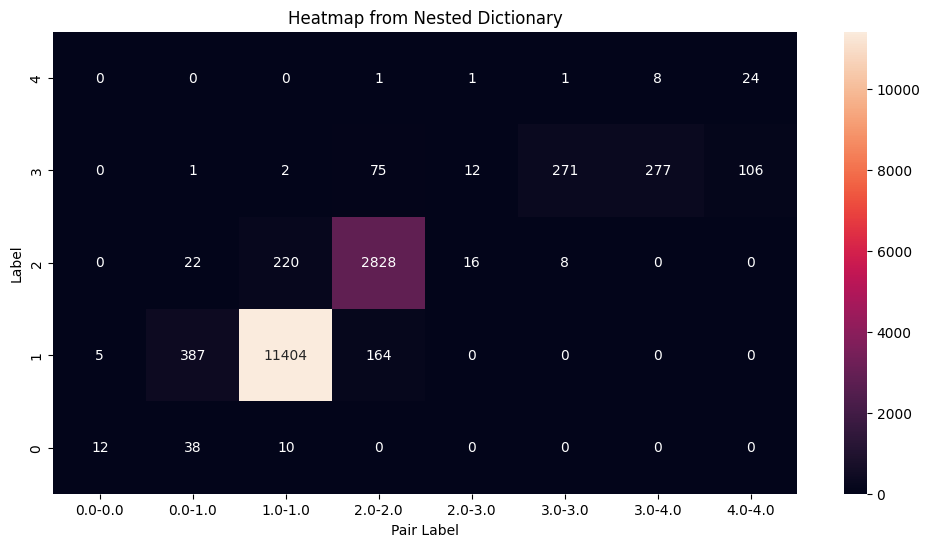

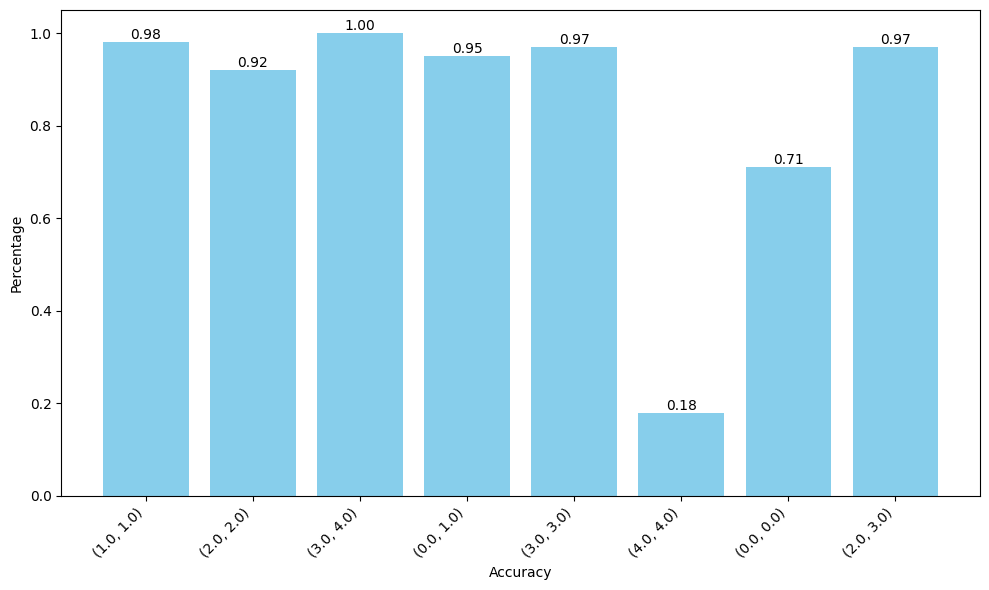

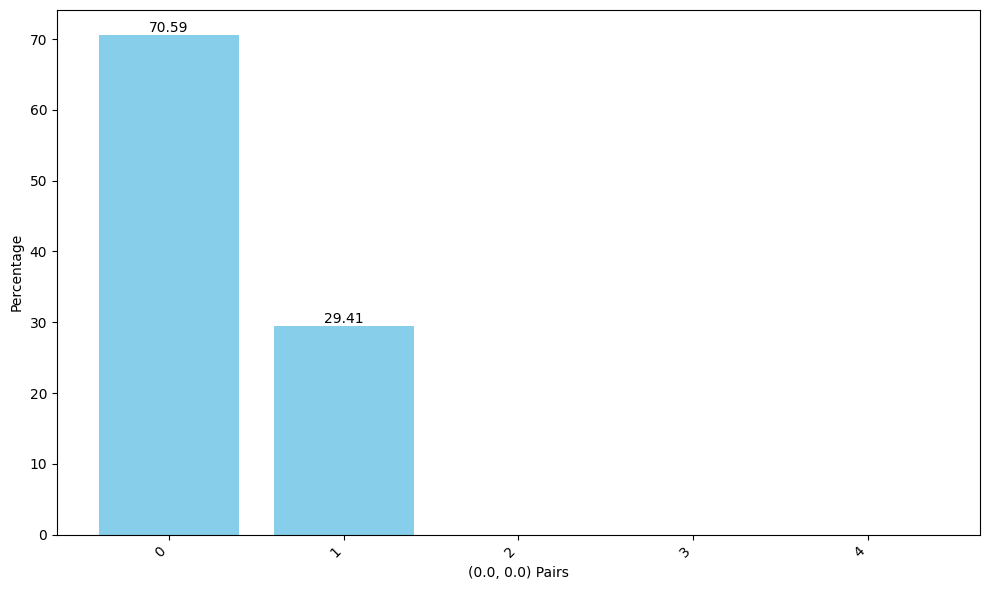

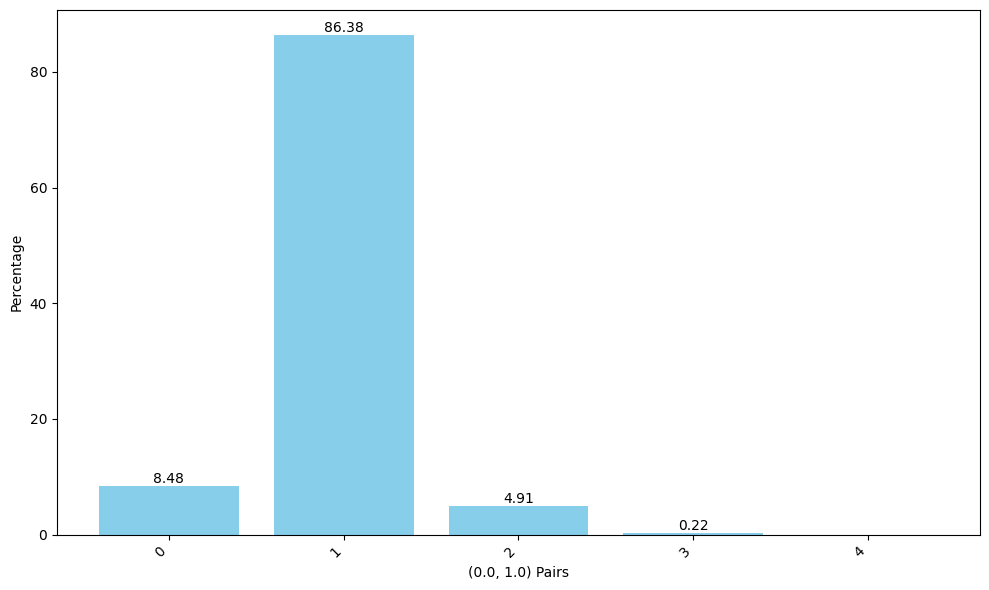

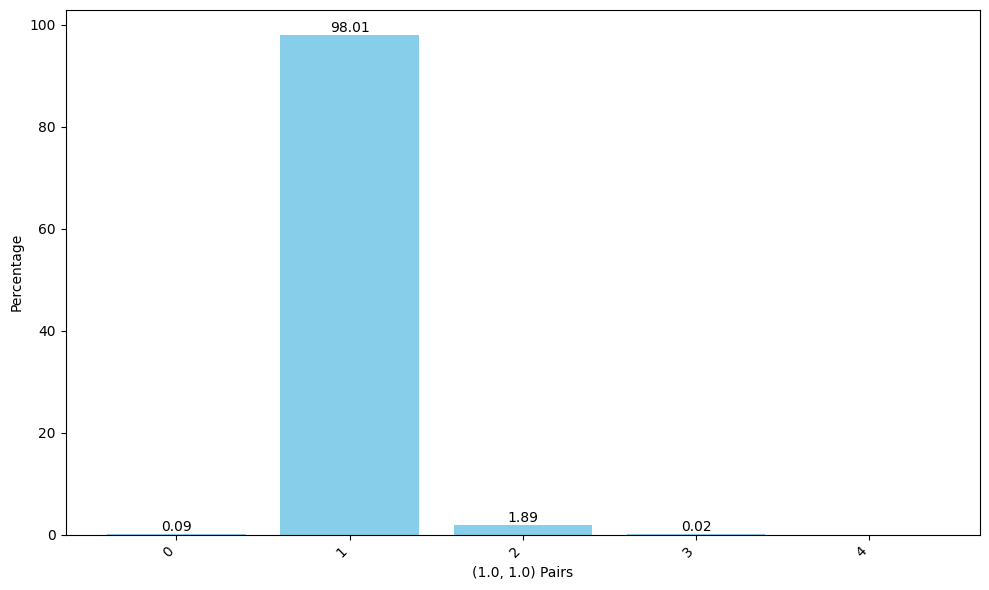

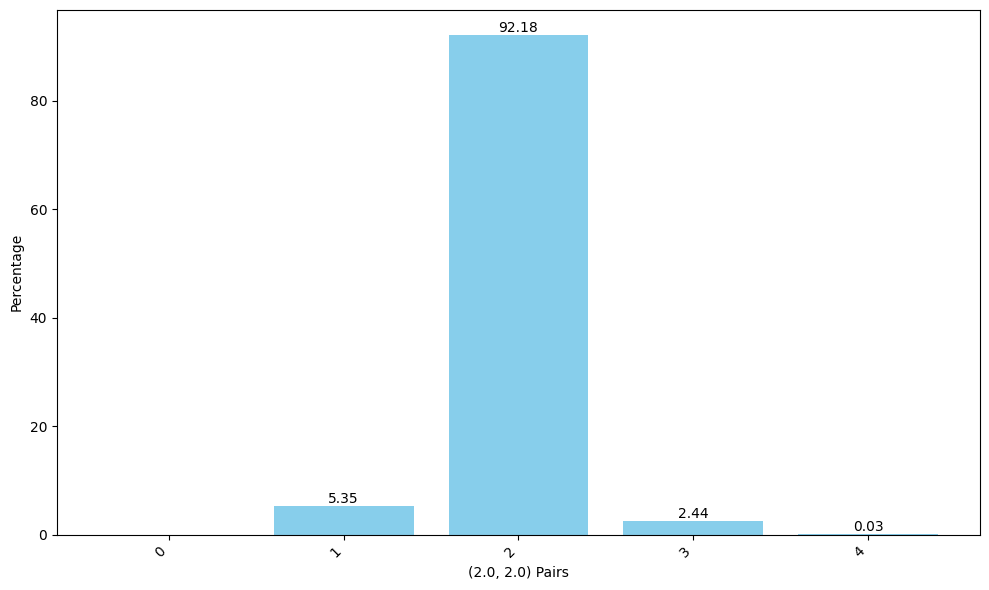

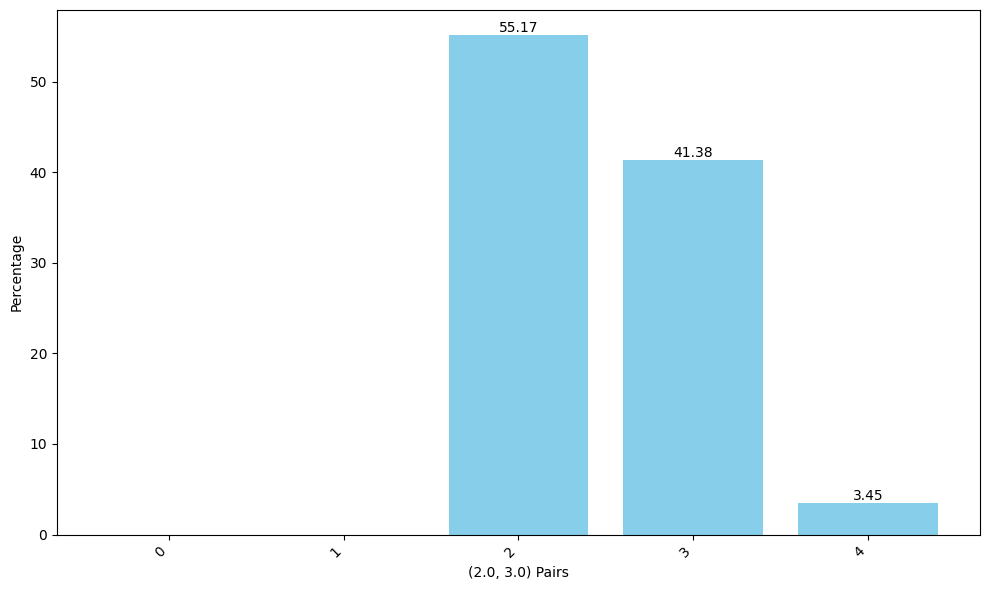

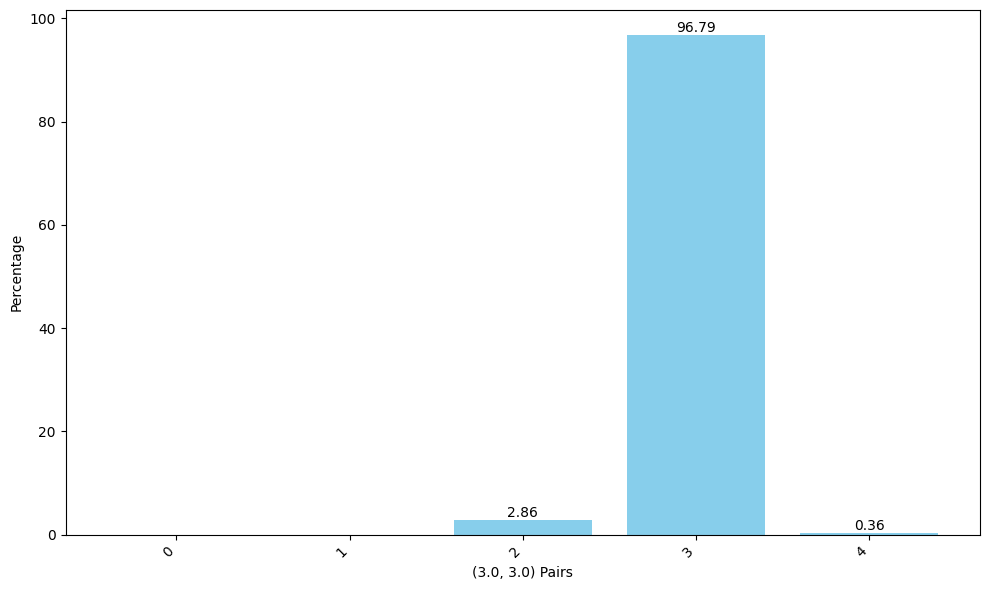

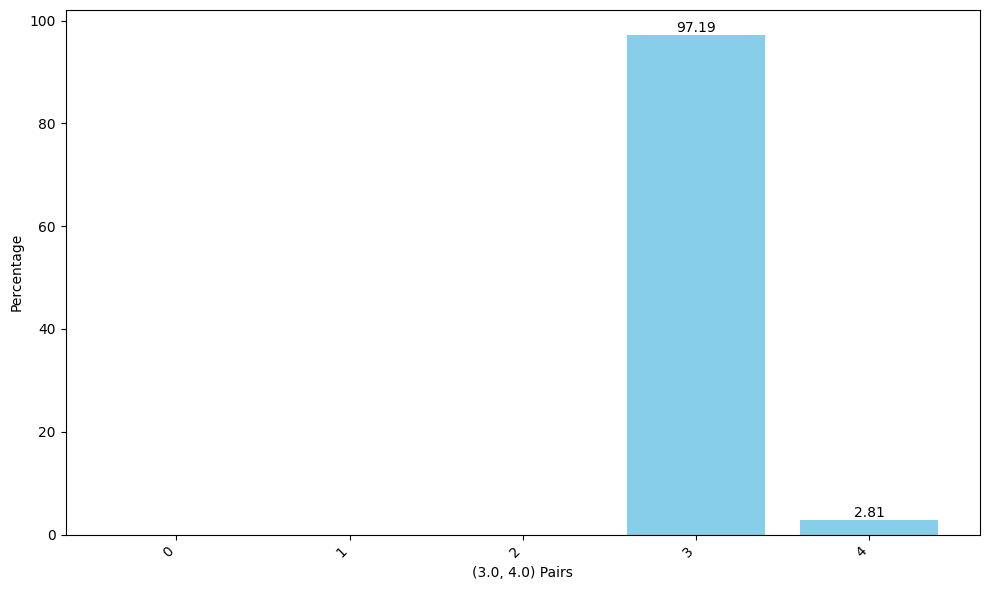

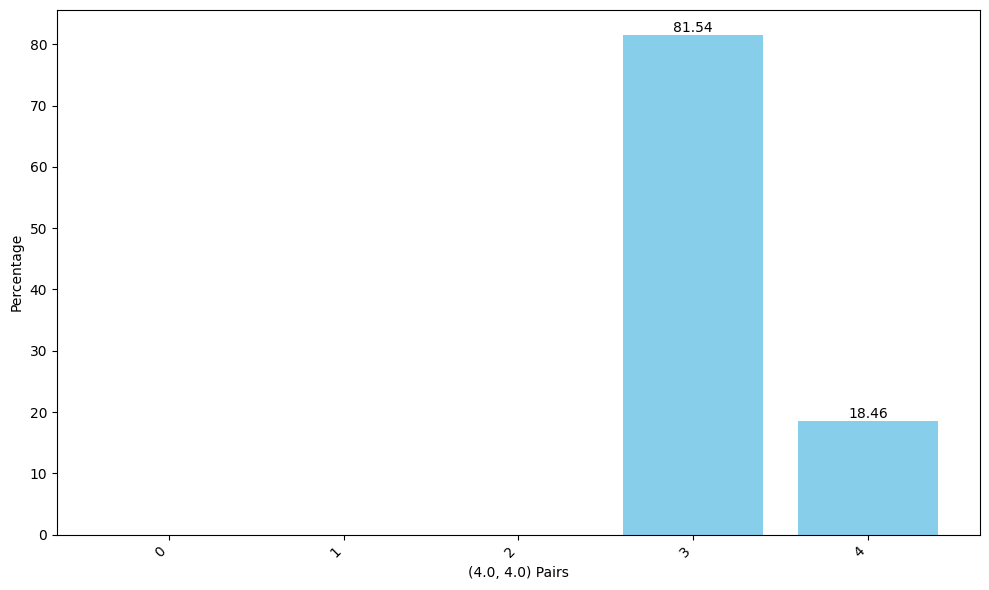

In [ ]:
reporting(ga.first_y_test, ga.second_y_test, predicted_labels)